In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-oldies-dataset/oldies_60s_top_artists_tracks.csv


In [2]:
# Load the data
data = pd.read_csv("../input/spotify-oldies-dataset/oldies_60s_top_artists_tracks.csv")

In [3]:
# Display the first few records
print(data.head())

        Artist                            Track Name  Popularity  \
0  The Beatles  Here Comes The Sun - Remastered 2009          87   
1  The Beatles           Yesterday - Remastered 2009          80   
2  The Beatles       Come Together - Remastered 2009          80   
3  The Beatles     Twist And Shout - Remastered 2009          80   
4  The Beatles           Let It Be - Remastered 2009          80   

   Duration (ms)                Track ID  
0         185733  6dGnYIeXmHdcikdzNNDMm2  
1         125666  3BQHpFgAp4l80e1XslIjNI  
2         259946  2EqlS6tkEnglzr7tkKAAYD  
3         155226  5ZBeML7Lf3FMEVviTyvi8l  
4         243026  7iN1s7xHE4ifF5povM6A48  


In [4]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         484 non-null    object
 1   Track Name     484 non-null    object
 2   Popularity     484 non-null    int64 
 3   Duration (ms)  484 non-null    int64 
 4   Track ID       484 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.0+ KB
None


In [5]:
# Descriptive statistics
print(data.describe())

       Popularity  Duration (ms)
count  484.000000     484.000000
mean    56.163223  190543.386364
std     17.440707   67192.336630
min      0.000000   82680.000000
25%     43.750000  151656.000000
50%     59.000000  169866.500000
75%     70.000000  206310.000000
max     90.000000  544640.000000


In [6]:
# Handling missing data
print(data.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


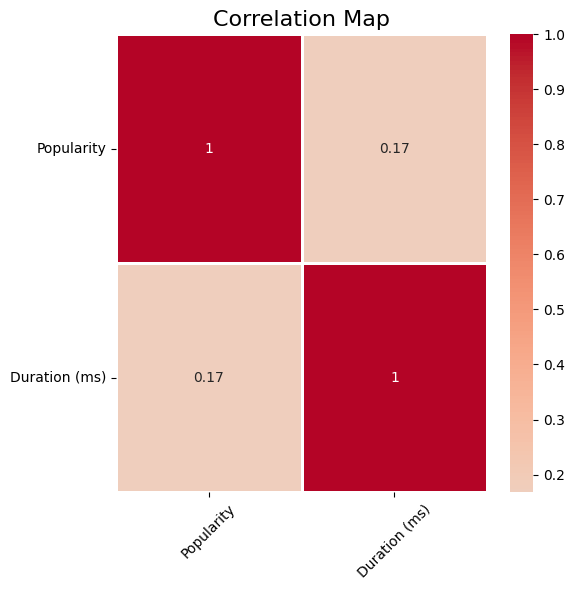

In [7]:
# Select numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(6, 6))  # Increase figure size
plt.title('Correlation Map', fontsize=16)  # Add font size to title
ax = sns.heatmap(numeric_columns.corr(), linewidths=1, annot=True, center=0, cmap="coolwarm")  # Adjust spacing and use cmap
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels without rotation
plt.tight_layout()  # Automatically adjust spacing between subplots so that the elements of the plot fit into the figure
plt.show()

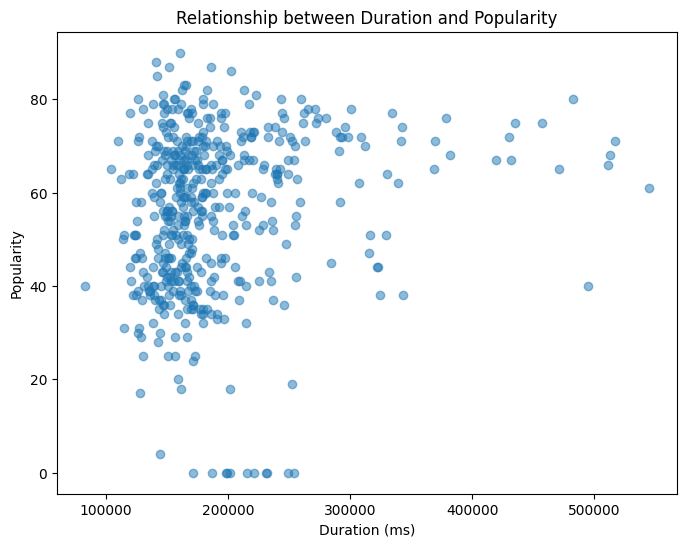

In [8]:
# Plot scatter plot to explore relationship between 'Duration (ms)' and 'Popularity'
plt.figure(figsize=(8, 6))
plt.scatter(data['Duration (ms)'], data['Popularity'], alpha=0.5)
plt.title('Relationship between Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

In [9]:
# Convert duration from milliseconds to seconds
data['Duration (seconds)'] = data['Duration (ms)'] / 1000
data['Duration (seconds)'] = data['Duration (seconds)'].round().astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Artist              484 non-null    object
 1   Track Name          484 non-null    object
 2   Popularity          484 non-null    int64 
 3   Duration (ms)       484 non-null    int64 
 4   Track ID            484 non-null    object
 5   Duration (seconds)  484 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 22.8+ KB


In [11]:
# Create a bar plot of popularity vs song duration
fig_bar = px.bar(data, x='Duration (seconds)', y='Popularity',
                 title='Popularity vs Song Duration',
                 labels={'Duration (seconds)': 'Duration (seconds)', 'Popularity': 'Popularity'})
fig_bar.show()

In [12]:
# Calculate mean popularity for each track
track_popularity_mean = data.groupby('Track Name')['Popularity'].mean()

# Select the top 10 most popular songs
top_tracks = track_popularity_mean.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 most popular songs
fig_top_tracks = px.bar(top_tracks, x=top_tracks.index, y=top_tracks.values,
                         color=top_tracks.values, color_continuous_scale='oxy',
                         labels={'x': 'Songs', 'y': 'Mean Popularity'},
                         title='Top 10 Most Popular Songs by Popularity')
fig_top_tracks.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig_top_tracks.show()

In [13]:
# Calculate mean popularity for each track
track_popularity_mean = data.groupby('Track Name')['Popularity'].mean()

# Select the top 20 least popular songs
worst_tracks = track_popularity_mean.sort_values(ascending=True).iloc[10:20]
#worst_tracks = track_popularity_mean.sort_values(ascending=True).head[20]

# Create a bar plot for the top 20 least popular songs
fig_worst_tracks = px.bar(worst_tracks, x=worst_tracks.index, y=worst_tracks.values,
                           color=worst_tracks.values, color_continuous_scale='oxy',
                           labels={'x': 'Songs', 'y': 'Mean Popularity'},
                           title='Top 10 Least Popular Songs by Popularity')
fig_worst_tracks.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig_worst_tracks.show()

In [14]:
# Calculate mean popularity for each artist
artist_popularity_mean = data.groupby('Artist')['Popularity'].mean()

# Select the top 10 most popular artists
top_artists = artist_popularity_mean.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 most popular artists
fig_top_artists = px.bar(top_artists, x=top_artists.index, y=top_artists.values,
                          color=top_artists.values, color_continuous_scale='greens',
                          labels={'x': 'Artists', 'y': 'Popularity'},
                          title='Top 10 Artists by Popularity')
fig_top_artists.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig_top_artists.show()

In [15]:
# Select the top 10 least popular artists
worst_artists = artist_popularity_mean.sort_values(ascending=True).head(10)

# Create a bar plot for the top 10 least popular artists
fig_worst_artists = px.bar(worst_artists, x=worst_artists.index, y=worst_artists.values,
                           color=worst_artists.values, color_continuous_scale='purples',
                           labels={'x': 'Artists', 'y': 'Popularity'},
                           title='Top 10 Least Popular Artists by Popularity')
fig_worst_artists.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig_worst_artists.show()

In [16]:
# Select the top 5 most popular artists
top_5_artists = data.groupby('Artist')['Popularity'].mean().nlargest(5).index

# Filter the DataFrame to include only songs by the top 5 artists
filtered_df_top = data[data['Artist'].isin(top_5_artists)]

# Create a scatter plot for the relationship between artist popularity and song durations
fig_top_scatter = px.scatter(filtered_df_top, x='Duration (seconds)', y='Popularity', color='Artist',
                             title='Relationship between Top 5 Artists by Popularity and Song Durations',
                             labels={'Duration (seconds)': 'Duration (seconds)', 'Popularity': 'Popularity'})
fig_top_scatter.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Select the top 5 least popular artists
bottom_5_artists = data.groupby('Artist')['Popularity'].mean().nsmallest(5).index

# Filter the DataFrame to include only songs by the bottom 5 artists
filtered_df_bottom = data[data['Artist'].isin(bottom_5_artists)]

# Create a scatter plot for the relationship between artist popularity and song durations
fig_bottom_scatter = px.scatter(filtered_df_bottom, x='Duration (seconds)', y='Popularity', color='Artist',
                                title='Relationship between Bottom 5 Artists by Popularity and Song Durations',
                                labels={'Duration (seconds)': 'Duration (seconds)', 'Popularity': 'Popularity'})
fig_bottom_scatter.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
# Calculate mean popularity for each artist and sort from highest to lowest
artist_popularity = data.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)
top_n_artists = artist_popularity.head(5).index.tolist()
data_top_artists = data[data["Artist"].isin(top_n_artists)]

# Create a boxplot of song durations by the top 5 artists
fig_top_boxplot = px.box(data_top_artists, x='Artist', y='Duration (seconds)',
                         title='Distribution of Song Durations by Top 5 Artists',
                         labels={'Artist': 'Artist', 'Duration (seconds)': 'Duration (seconds)'})
fig_top_boxplot.update_xaxes(tickangle=45)
fig_top_boxplot.show()

In [19]:
# Calculate mean popularity for each artist and sort from lowest to highest
bottom_n_artists = artist_popularity.tail(5).index.tolist()
data_bottom_artists = data[data["Artist"].isin(bottom_n_artists)]

# Create a boxplot of song durations by the bottom 5 artists
fig_bottom_boxplot = px.box(data_bottom_artists, x='Artist', y='Duration (seconds)',
                            title='Distribution of Song Durations by Bottom 5 Artists',
                            labels={'Artist': 'Artist', 'Duration (seconds)': 'Duration (seconds)'})
fig_bottom_boxplot.update_xaxes(tickangle=45)
fig_bottom_boxplot.show()